In [1]:
from google.colab import drive 
import os, glob
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
img_dir = './drive/MyDrive/Dog_breeds_Dataset'
categories = os.listdir(img_dir)
nb_classes =  len(categories)
print(nb_classes)
print(categories[3])

25
Blenheim_spaniel


In [4]:
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        horizontal_flip=True,
        fill_mode='nearest')

img_dir = './drive/MyDrive/Dog_breeds_Dataset'
categories = os.listdir(img_dir)
nb_classes =  len(categories)

for idx, cat in enumerate(categories):
    
    label = [0 for i in range(nb_classes)]
    label[idx] = 1 
   
    image_dir = img_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    for i, f in enumerate(files):
        img = Image.open(f)  
        x = img_to_array(img) 
        x = x.reshape((1,) + x.shape)  

        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=img_dir + "/" + categories[idx], save_prefix='aug', save_format='jpg'):
            i += 1
            if i > 3:
                break  

In [5]:
img_dir = './drive/MyDrive/Dog_breeds_Dataset'
categories = os.listdir(img_dir)
nb_classes =  len(categories)

image_w = 128 
image_h = 128
pixels = image_w * image_h * 3

X = []
Y = []
for idx, cat in enumerate(categories):
    label = [0 for i in range(nb_classes)]
    label[idx] = 1 
    image_dir = img_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    for i, f in enumerate(files):
        img = Image.open(f) 
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        X.append(data)
        Y.append(label)

X = np.array(X)
Y = np.array(Y)

X_train, X_test, y_train, y_test = \
    train_test_split(X, Y, test_size=0.3, shuffle=True,)
xy = (X_train, X_test, y_train, y_test)
np.save(".data.npy", xy)
print("ok,", len(Y))
X_train = X_train.astype("float") / 256
X_test  = X_test.astype("float")  / 256

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ok, 15873


In [6]:
print('X_train shape:', X_train.shape)
print('X_test shape', X_test.shape)

X_train shape: (11111, 128, 128, 3)
X_test shape (4762, 128, 128, 3)


In [7]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same', data_format='channels_last'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'])

results = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])

Epoch 1/20
695/695 [==============================] - 319s 436ms/step - loss: 0.1854 - accuracy: 0.0889 - val_loss: 0.1396 - val_accuracy: 0.2654
Epoch 2/20
695/695 [==============================] - 302s 434ms/step - loss: 0.1321 - accuracy: 0.3178 - val_loss: 0.1284 - val_accuracy: 0.3562
Epoch 3/20
695/695 [==============================] - 301s 434ms/step - loss: 0.1169 - accuracy: 0.4227 - val_loss: 0.1378 - val_accuracy: 0.3620
Epoch 4/20
695/695 [==============================] - 302s 434ms/step - loss: 0.1084 - accuracy: 0.4957 - val_loss: 0.1163 - val_accuracy: 0.4691
Epoch 5/20
695/695 [==============================] - 302s 434ms/step - loss: 0.1019 - accuracy: 0.5499 - val_loss: 0.1137 - val_accuracy: 0.4996
Epoch 6/20
695/695 [==============================] - 305s 439ms/step - loss: 0.0935 - accuracy: 0.5980 - val_loss: 0.1131 - val_accuracy: 0.5052
Epoch 7/20
695/695 [==============================] - 301s 434ms/step - loss: 0.0898 - accuracy: 0.6325 - val_loss: 0.1251 -

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

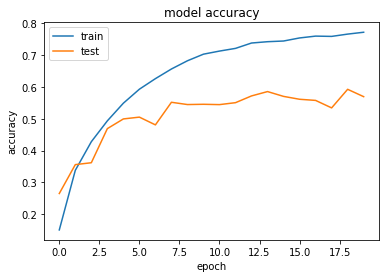

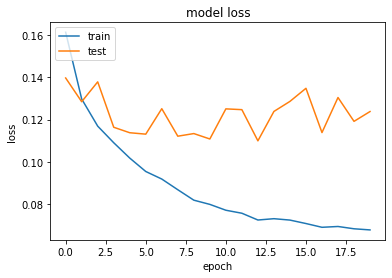

In [9]:
import matplotlib.pyplot as plt

plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save("my_model")